In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c #gets the roots of ax^2 + bx + c

In [95]:
def check_initial_values(f, x_min, x_max, tol):
    
    #check our initial guess
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check that x_min and x_max contain a zero crossing
    if(y_min*y_max>=0.0):
        print("No zero crossing found in the range = ",x_min,x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    
    #if x_min is a root, then return flag == 1
    if(np.fabs(y_min)<tol):
        return 1

    #if x_max is a root, then return flag == 2
    if(np.fabs(y_max)<tol):
        return 2
    
    #if we reach this point, the brackets is valid
    #and we will return 3
    return 3

def bisection_root_finding(f, x_min_start, x_max_start, tol):
    #this function uses bisection search to find a root
    
    x_min = x_min_start #minimum x in bracket
    x_max = x_max_start #maximum x in bracket
    x_mid = 0.0         #mid point
    
    y_min = f(x_min)    #function value at x_min
    y_max = f(x_max)    #function value at x_max
    y_mid = 0.0         #function value at midpoint
    
    imax = 10000 #set a max number of iterations
    i = 0        #iteration counter
    
    #check initial values
    flag = check_initial_values(f, x_min,x_max,tol)
    if(flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        #lucky guess
        return x_min
    elif(flag==2):
        #another lucky guess
        return x_max
    
    #if we reach here, then we need to conduct the search
    
    #set a flag
    flag = 1
    
    #enter a while loop
    while(flag):
        x_mid = 0.5*(x_min+x_max) #mid point
        y_mid = f(x_mid)
        
        plt.plot(x_min, function_for_roots(x_min), marker = 'o', markersize=5)
        plt.plot(x_max, function_for_roots(x_max), marker = 'o', markersize=5)
        
        #check if x_mid is a root
        if(np.fabs(y_mid)<tol):
            flag = 0
        else:
            #x_mid is not a root
                
            #if the product of the function at the midpoint
            #and at one of the end points is greater than
            #zero,replace this end point
            if(f(x_min)*f(x_mid)>0):
                #replace x_min with x_mid
                x_min = x_mid
            else:
                #replace x_max with x_mid
                x_max = x_mid
                    
        #print out the iteration
        #print(x_min,f(x_min),x_max,f(x_max))
            
        #count the iteration
        i += 1
            
        #if we have exceeded the max number
        #of iterations, exit
        if(i>=imax):
            print("Exceeded max number of iterations = ",i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Min bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after ',i)
    #end
    return x_mid

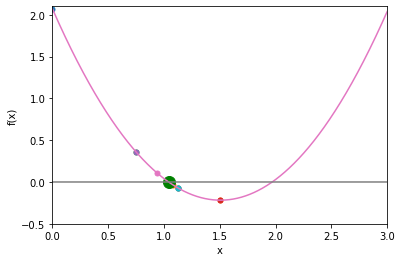

In [97]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

#print the initial guess
#print(x_min,function_for_roots(x_min))
#print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots, x_min, x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) = %f" % (x_root, y_root)
#print(s)

plt.plot(x_root, y_root, color = 'green', marker = 'o', markersize=12)

x = np.arange(0, 3, 0.001)
plt.xlim(0, 3)
plt.ylim(-0.5, 2.1)
a = 0*x
y = function_for_roots(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, a)
plt.show()